In [1464]:
import pandas as pd
import numpy as np

In [1465]:
df1 = pd.read_csv("transaction_dataset.csv") #9841 rows
df1.drop(columns=['Unnamed: 0', 'Index'], inplace = True) # drop the first two columns cause unique
df1.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

In [1466]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df1.select_dtypes('O').columns.astype('category')
df1[categories]

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [1467]:
df1.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


From the above, the mean of some of these variables which should be non-negative(>=0) are 0. This highly suggests that the values of these columns are 0. To try and identify these variables, run through the columns(excluding the label itself) and print out the ones with 2 or less than 1 values.

In [1468]:
for c in df1.columns:
    if df1[c].unique().__len__() <= 2 and c!='FLAG':
        print(c,'unique values:', df1[c].unique())

 ERC20 avg time between sent tnx unique values: [ 0. nan]
 ERC20 avg time between rec tnx unique values: [ 0. nan]
 ERC20 avg time between rec 2 tnx unique values: [ 0. nan]
 ERC20 avg time between contract tnx unique values: [ 0. nan]
 ERC20 min val sent contract unique values: [ 0. nan]
 ERC20 max val sent contract unique values: [ 0. nan]
 ERC20 avg val sent contract unique values: [ 0. nan]


In [1469]:
no_var = df1.var() == 0
df1.var()[no_var].index

/var/folders/96/5lhdzdnj22v9lw7wxwdddk0r0000gn/T/ipykernel_2693/1926140449.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  no_var = df1.var() == 0
/var/folders/96/5lhdzdnj22v9lw7wxwdddk0r0000gn/T/ipykernel_2693/1926140449.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.var()[no_var].index


Index([' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract',
       ' ERC20 max val sent contract', ' ERC20 avg val sent contract'],
      dtype='object')

This also explains why the variance of these variables are 0. Drop these three columns as they are most likely actually supposed to be null for every row(0 used to replace NaN in certained rows when the person was keying in the data), meaning they give us no information at all.

In [1470]:
cols = [' ERC20 min val sent contract',
' ERC20 max val sent contract', 
' ERC20 avg val sent contract',
' ERC20 avg time between rec 2 tnx',
' ERC20 avg time between contract tnx',
' ERC20 avg time between sent tnx',
' ERC20 avg time between rec tnx']
df1.drop(columns=cols, inplace=True)
df1.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9012.000000,9012.000000,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,0.003440,4.901909,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,0.065698,17.246576,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,0.000000,2.000000,0.001523,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,3.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


In [1471]:
df1['FLAG'].value_counts() #imbalanced

0    7662
1    2179
Name: FLAG, dtype: int64

In [1472]:
import seaborn as sns
import matplotlib.pyplot as plt

### Notice how a lot of the rows with na values are actually flagged as fraud

Observe how only columns involving data related to ERC20 is missing.
##### What is ERC20?
ERC-20 allows <b>different</b> smart-contract enabled tokens a way to be exchanged. Tokens, in this regard, are a representation of an asset, right, ownership, access, cryptocurrency, or anything else that is not unique in and of itself but can be transferred. The standard allows tokens representing one of these factors—along with smart contracts—to be exchanged for a token that represents another. Smart contracts are conditions written into the coding that execute different aspects of a transaction between parties.

ERC-20 guides the creation of new tokens on the Ethereum blockchain so that they are interchangeable with other tokens used within smart contracts.

##### What's the Difference Between ETH and ERC-20?
Ether (ETH) is the native token used by the Ethereum blockchain and network as a payment system for verifying transactions. ERC-20 is the standard for creating smart contract-enabled fungible tokens to be used in the Ethereum ecosystem.
In this dataset, ERC-20 most likely refers to tokens which are ERC-20 compliant

We may suspect that transactions involving tokens which aren't ERC-20 compliant are often associated with fraud

In [1473]:
cols_NA_counts = df1.isnull().sum()
cols_NA_counts

Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract              

In [1474]:
cols_with_NA = cols_NA_counts.where(lambda x : x > 0).dropna()
print(cols_with_NA)

 Total ERC20 tnxs                   829.0
 ERC20 total Ether received         829.0
 ERC20 total ether sent             829.0
 ERC20 total Ether sent contract    829.0
 ERC20 uniq sent addr               829.0
 ERC20 uniq rec addr                829.0
 ERC20 uniq sent addr.1             829.0
 ERC20 uniq rec contract addr       829.0
 ERC20 min val rec                  829.0
 ERC20 max val rec                  829.0
 ERC20 avg val rec                  829.0
 ERC20 min val sent                 829.0
 ERC20 max val sent                 829.0
 ERC20 avg val sent                 829.0
 ERC20 uniq sent token name         829.0
 ERC20 uniq rec token name          829.0
 ERC20 most sent token type         841.0
 ERC20_most_rec_token_type          851.0
dtype: float64


In [1475]:
erc20_cols = cols_with_NA.index
df1[df1[erc20_cols].isna().all(axis=1)]

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7662,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,0x0153775362c3071c1860e8dbfd53ccc82fa226f5,1,0.00,0.00,15432.58,1,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,0x015f17e2851ea392351b7f259e4cfd03dc443cef,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,0x0167409e6106ec3e3f05a09fcf04606918d21ad5,1,259.52,2.60,4417.03,17,2,5,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,0xfe9b7db8d9d57e9ad9341bcf51b110ba5d27b48b,1,193.09,81.82,1485.80,6,4,0,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,0xff0e20e3a7575d823302bbb27e233c23f2c3070b,1,0.00,0.00,0.00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,0xff2f6c6fbd71a078f1c1781855467d30897b5a33,1,0.00,49.51,12643.85,1,15,0,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,0xff35866acb80ce4b169d1460cd48108955c1c445,1,0.00,0.00,8427.92,0,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1476]:
df1[df1[erc20_cols].isna().all(axis=1)]['FLAG'].value_counts()

1    829
Name: FLAG, dtype: int64

- Based on these information, we can create a new feature that is 1 if that row NA value for ALL variables related to ERC20 and 0 if it doesn't.
- Name of the feature can be called "ERC-20 info all NA" since it just so happens that the NA values lie in features that give information about transactions involving ERC-20 compliant tokens

In [1477]:
df1['ERC-20 info all NA'] = df1.isnull().any(axis=1).apply(lambda x: int(x))

#### Take a look at correlations (end up quite useless except for one variable)

In [1478]:
df1.corr()['FLAG'][2:].dropna().apply(lambda x: (abs(x),'+ve' if x > 0 else '-ve')).sort_values(ascending=False)

ERC-20 info all NA                                          (0.553403780887705, +ve)
Time Diff between first and last (Mins)                    (0.2693537569722309, -ve)
Avg min between received tnx                               (0.1185333698301473, -ve)
total transactions (including tnx to create contract      (0.10028896008507175, -ve)
Received Tnx                                              (0.07931619280730286, -ve)
Sent tnx                                                  (0.07800602196583913, -ve)
avg val sent                                               (0.0635562890151814, -ve)
Unique Sent To Addresses                                  (0.04558386884087186, -ve)
Unique Received From Addresses                            (0.03194102392769172, -ve)
 Total ERC20 tnxs                                        (0.025696890085446983, -ve)
 ERC20 min val sent                                       (0.02536415408744808, +ve)
 ERC20 avg val sent                                       (0.0250

Fraud transactions have shorter average time gap between each transaction by the same frauder

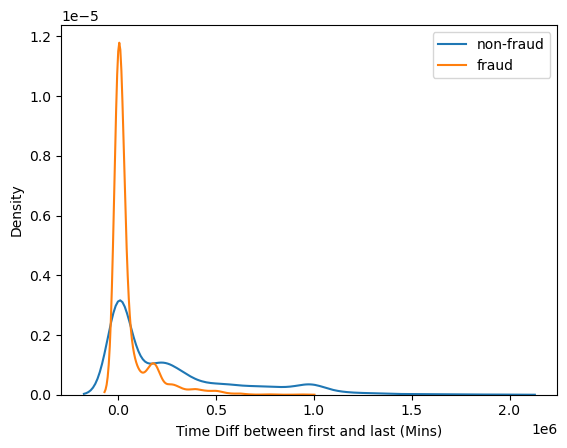

In [1479]:
sns.kdeplot(data = df1[df1['FLAG']==0], x='Time Diff between first and last (Mins)')
sns.kdeplot(data = df1[df1['FLAG']==1], x='Time Diff between first and last (Mins)')
plt.legend(['non-fraud','fraud'])

##### Look at the dimension of each feature

In [1480]:
df1.nunique()

Address                                                 9816
FLAG                                                       2
Avg min between sent tnx                                5013
Avg min between received tnx                            6223
Time Diff between first and last (Mins)                 7810
Sent tnx                                                 641
Received Tnx                                             727
Number of Created Contracts                               20
Unique Received From Addresses                           256
Unique Sent To Addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent                                            6647
avg val sent                                            5854
min value sent to contra

In [1481]:
df1.drop(columns=['Address'],inplace=True) #drop address as it is a categorical variable with too many unique values

##### Handling NA in numerical features

In [1482]:
# Replace missings of numerical variables with median
df1.fillna(df1.median(), inplace=True)

/var/folders/96/5lhdzdnj22v9lw7wxwdddk0r0000gn/T/ipykernel_2693/3099460311.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.fillna(df1.median(), inplace=True)


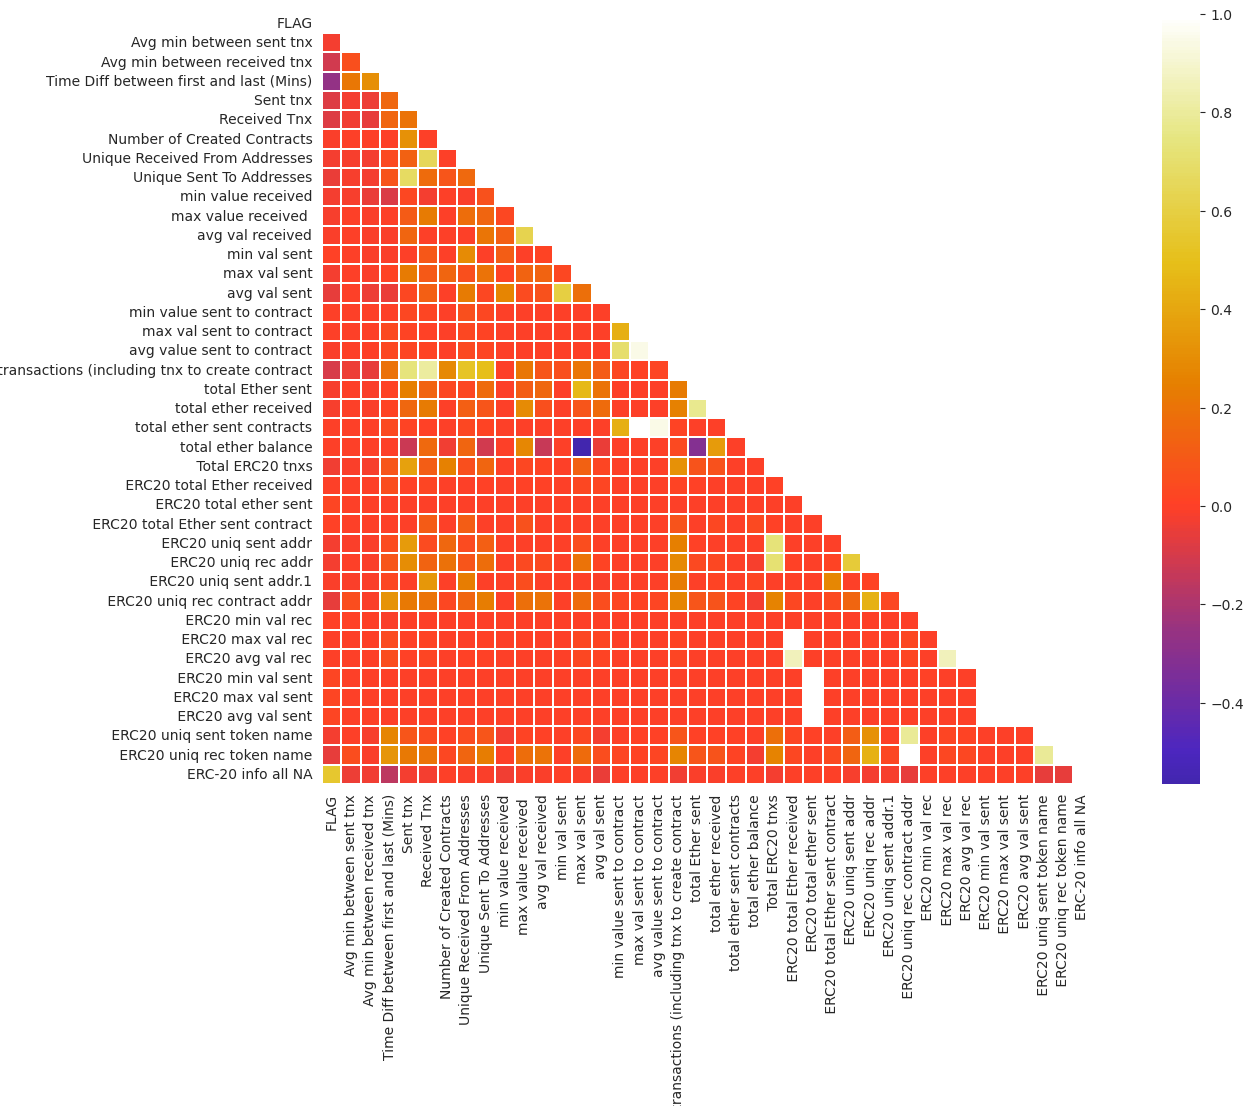

In [1483]:
# Recheck the Correlation matrix
corr = df1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

For every two features that are highly correlated with each other and FLAG is not one of it, choose one of the two to drop

In [1484]:
drop = [' ERC20 total ether sent',' ERC20 total Ether received', 'total ether sent contracts',' ERC20 uniq rec contract addr',
' ERC20 min val sent','avg value sent to contract', ' ERC20 avg val sent', 'Received Tnx', ' ERC20 max val rec',
' ERC20 uniq sent token name', 'total transactions (including tnx to create contract',' Total ERC20 tnxs','total ether received',
'Unique Sent To Addresses','min val sent',' ERC20 uniq sent addr.1','total ether balance'] #dropping 17 cols
df1.drop(columns=drop, inplace=True, axis=1)


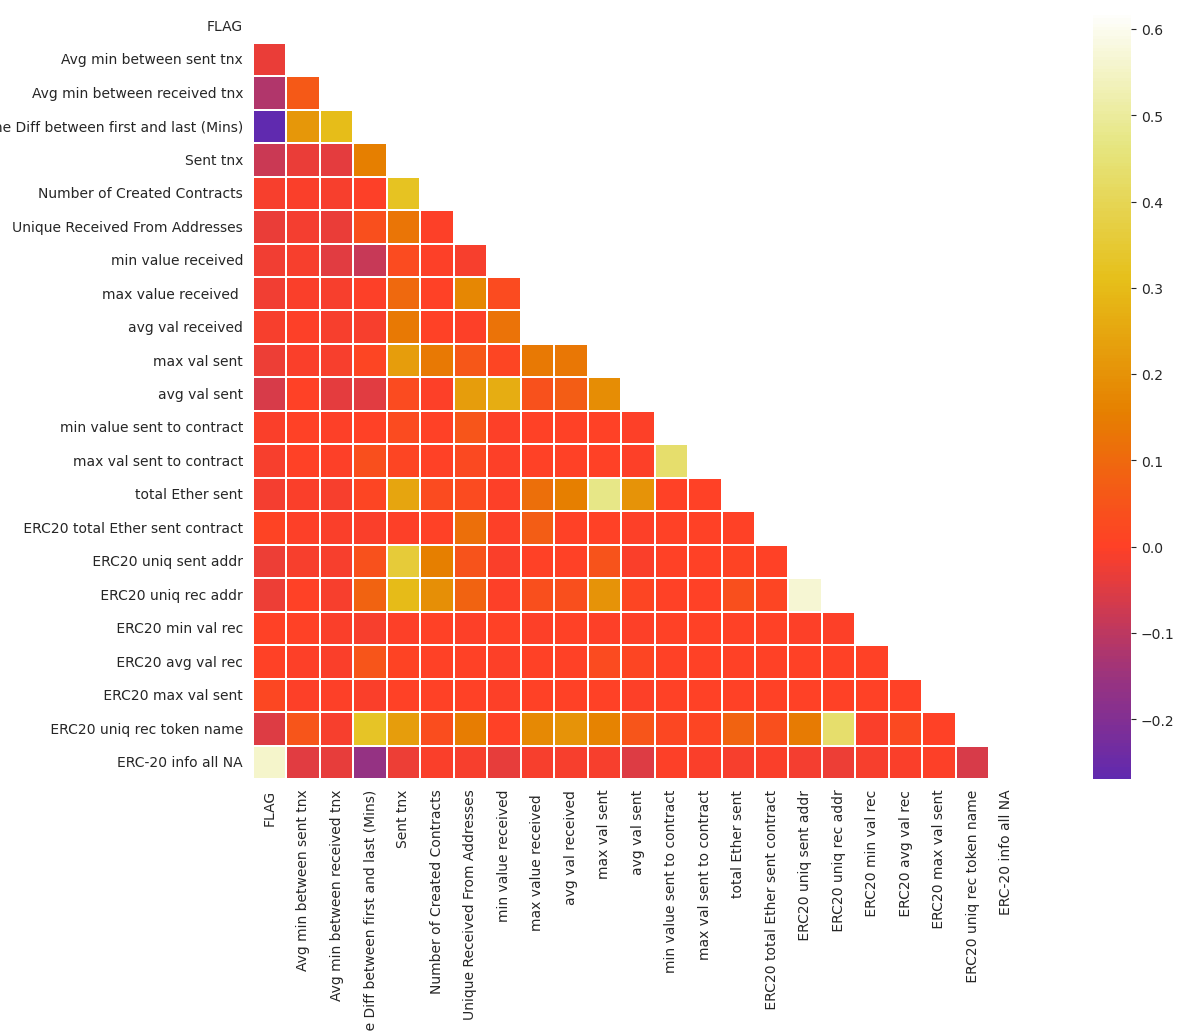

In [1485]:
corr = df1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

##### Take a look at the dimensions of the features again

In [1486]:
df1.nunique()

FLAG                                          2
Avg min between sent tnx                   5013
Avg min between received tnx               6223
Time Diff between first and last (Mins)    7810
Sent tnx                                    641
Number of Created Contracts                  20
Unique Received From Addresses              256
min value received                         4589
max value received                         6302
avg val received                           6767
max val sent                               6647
avg val sent                               5854
min value sent to contract                    3
max val sent to contract                      4
total Ether sent                           5868
 ERC20 total Ether sent contract             29
 ERC20 uniq sent addr                       107
 ERC20 uniq rec addr                        147
 ERC20 min val rec                         1276
 ERC20 avg val rec                         3380
 ERC20 max val sent                     

Take a closer look at the features with a very low dimension

In [1487]:
df1['min value sent to contract'].value_counts()

0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64

In [1488]:
df1['max val sent to contract'].value_counts()

0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: max val sent to contract, dtype: int64

Drop these columns as most observations are valued at 0

In [1489]:
drop = ['min value sent to contract','max val sent to contract', ' ERC20 total Ether sent contract']
df1.drop(columns=drop, inplace=True)

In [1490]:
df1.groupby(by=['FLAG','Number of Created Contracts']).size()

FLAG  Number of Created Contracts
0     0                              6491
      1                              1140
      2                                 8
      3                                 6
      4                                 2
      5                                 2
      6                                 1
      16                                1
      19                                1
      41                                1
      1180                              1
      2096                              1
      2404                              1
      2550                              1
      3128                              1
      3521                              1
      3900                              1
      6453                              1
      9995                              1
1     0                              1994
      1                               180
      3                                 1
      4                                 2


Set a cap on 'Number of Created Contracts' to 1, but don't drop it as its not largely 0. Also name it differently now.

In [1491]:
df1['hasCreatedContracts'] = df1['Number of Created Contracts'].apply(lambda x: x if x < 1 else 1)
df1.groupby(by=['FLAG','hasCreatedContracts']).size()
df1.drop(columns='Number of Created Contracts',inplace=True)

Take a look at the Nominal variables

In [1492]:
df1.groupby(by=['FLAG',' ERC20 most sent token type']).size().get(1).sort_values(ascending=False)

 ERC20 most sent token type
                                 1191
blockwell.ai KYC Casper Token      33
Tronix                             14
OmiseGO                             7
VeChain                             5
                                 ... 
Lucky Token                         1
Magna                               1
Merculet                            1
Brickblock                          1
minereum                            1
Length: 78, dtype: int64

In [1493]:
df1.groupby(by=['FLAG',' ERC20 most sent token type']).size().get(0).sort_values(ascending=False)

 ERC20 most sent token type
0                                      4399
None                                   1856
EOS                                     135
OmiseGO                                 130
Golem                                   126
                                       ... 
Opus                                      1
DNA                                       1
PangeaCoinICO                             1
DAPSTOKEN                                 1
LocalCoinSwap dividend token 2019Q1       1
Length: 262, dtype: int64

In [1494]:
df1.groupby(by=['FLAG',' ERC20_most_rec_token_type']).size().get(1).sort_values(ascending=False).index
df1[' ERC20_most_rec_token_type']=df1[' ERC20_most_rec_token_type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None',np.nan] else x)

Notice how some names actually likely meant NA, but are labelled in different ways. We can try and identify these different labels and group them together

In [1495]:
df1[' ERC20 most sent token type']=df1[' ERC20 most sent token type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None'] else x)
#Relabel all those that are missing but labelled differently under the name "Unknown"
df1[' ERC20 most sent token type']=df1[' ERC20 most sent token type'].apply(lambda x: 'Unknown' if x in ['',' ',"''",'NaN', None,'0',np.NaN,np.NAN,'None'] else x)

In [1496]:
df1[df1['FLAG']==1].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Unique Received From Addresses,min value received,max value received,avg val received,max val sent,avg val sent,total Ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 uniq rec token name,ERC-20 info all NA,hasCreatedContracts
count,2179.0,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2.179000e+03,2.179000e+03,2179.000000,2179.000000,2179.000000
mean,1.0,3888.109780,2874.712639,55230.057953,5.173933,12.475906,30.619509,53.383739,36.440837,35.721383,16.263756,87.373398,0.300138,2.970170,579.026267,5.183367e+06,5.167833e+07,2.926572,0.380450,0.084901
std,0.0,17505.367743,10624.453455,107518.118553,21.884569,69.380810,535.349338,707.310512,557.835910,518.604992,270.486110,1689.409333,2.086261,10.772995,14346.761152,2.255434e+08,2.399332e+09,10.105555,0.485609,0.278799
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
50%,1.0,0.000000,82.070000,7545.430000,1.000000,3.000000,0.004463,0.997900,0.500134,0.688005,0.499139,0.999139,0.000000,1.000000,0.000000,1.337000e+00,0.000000e+00,1.000000,0.000000,0.000000
75%,1.0,434.095000,694.700000,48303.700000,2.000000,9.000000,0.150000,4.990015,1.082389,6.589494,3.581926,10.081873,0.000000,1.000000,1.337000,1.337000e+01,0.000000e+00,1.000000,1.000000,0.000000
max,1.0,262976.000000,194451.330000,933778.820000,472.000000,2001.000000,10000.000000,18998.000000,10000.000000,20000.000000,10162.666670,70020.000000,54.000000,188.000000,567580.000000,1.050000e+10,1.120000e+11,211.000000,1.000000,1.000000


In [1497]:
df1[df1['FLAG']==0].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Unique Received From Addresses,min value received,max value received,avg val received,max val sent,avg val sent,total Ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 uniq rec token name,ERC-20 info all NA,hasCreatedContracts
count,7662.0,7662.000000,7662.000000,7.662000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7.662000e+03,7662.000000,7662.000000,7662.000000,7.662000e+03,7.662000e+03,7662.000000,7662.000000,7662.000000
mean,0.0,5427.797217,9463.813842,2.647183e+05,147.430175,35.447272,47.606401,656.750247,118.989750,393.932645,52.858578,1.302575e+04,6.546072,8.200861,406.507613,3.637878e+06,6.359648e+05,4.953015,0.004046,0.152832
std,0.0,22479.761351,25349.420434,3.477739e+05,855.489695,336.233407,234.310386,14735.674899,3255.859303,7506.075539,228.736821,4.060498e+05,114.120603,88.539072,16636.555680,1.986587e+08,1.736030e+07,17.283054,0.063483,0.359849
min,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,3.206700e+02,1.000000,1.000000,0.006687,1.303643,0.704126,0.544625,0.202771,9.985256e-01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.0,22.745000,1402.135000,1.166260e+05,3.000000,2.000000,0.157340,12.216789,3.747374,9.698321,2.309737,3.406226e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,0.0,651.947500,7284.062500,3.892398e+05,16.000000,5.000000,8.458613,95.431114,50.500000,85.999005,33.666149,1.009990e+02,0.000000,2.000000,0.000000,3.072593e+01,0.000000e+00,2.000000,0.000000,0.000000
max,0.0,430287.670000,482175.490000,1.954861e+06,10000.000000,9999.000000,10000.000000,800000.000000,283618.831600,520000.000000,12000.000000,2.858096e+07,6582.000000,4293.000000,990000.000000,1.724181e+10,1.000010e+09,737.000000,1.000000,1.000000


Just for the sake of it, look at the dimensions of each variable again after all that processing

In [1498]:
df1.nunique()

FLAG                                          2
Avg min between sent tnx                   5013
Avg min between received tnx               6223
Time Diff between first and last (Mins)    7810
Sent tnx                                    641
Unique Received From Addresses              256
min value received                         4589
max value received                         6302
avg val received                           6767
max val sent                               6647
avg val sent                               5854
total Ether sent                           5868
 ERC20 uniq sent addr                       107
 ERC20 uniq rec addr                        147
 ERC20 min val rec                         1276
 ERC20 avg val rec                         3380
 ERC20 max val sent                        1130
 ERC20 uniq rec token name                  121
 ERC20 most sent token type                 302
 ERC20_most_rec_token_type                  465
ERC-20 info all NA                      

In [1499]:
df1.groupby(by=['FLAG','Sent tnx']).size().get(0)

Sent tnx
0        1194
1         879
2        1022
3        1190
4         335
         ... 
9996        5
9997        2
9998        4
9999        4
10000       1
Length: 639, dtype: int64

##### Capping numerical variables

In [1500]:
df1['Sent tnx'] = df1['Sent tnx'].apply(lambda x: min(x,20))

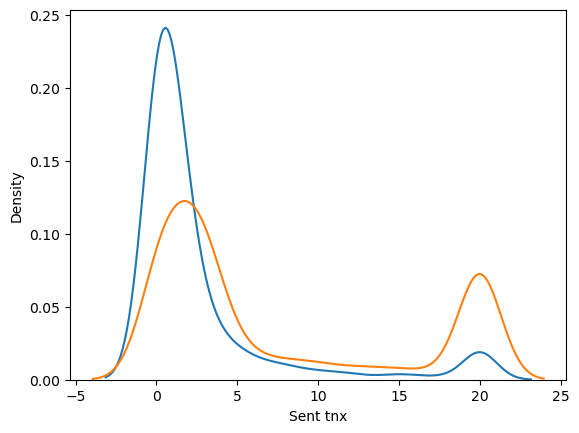

In [1501]:
sns.kdeplot(data=df1[df1['FLAG']==1], x='Sent tnx')
sns.kdeplot(data=df1[df1['FLAG']==0], x='Sent tnx')
plt.show()

In [1502]:
df1.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Unique Received From Addresses,min value received,max value received,avg val received,max val sent,avg val sent,total Ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 avg val rec,ERC20 max val sent,ERC20 uniq rec token name,ERC-20 info all NA,hasCreatedContracts
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9841.000000,9841.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,6.302815,30.360939,43.845153,523.152481,100.711721,314.617297,44.755731,1.016092e+04,5.163093,7.042679,444.706794,3.980082e+06,1.193780e+07,4.504319,0.087389,0.137791
std,0.415224,21486.549974,23081.714801,3.229379e+05,7.545456,298.621112,325.929139,13008.821539,2885.002236,6629.212643,239.080215,3.583227e+05,100.733483,78.317580,16157.005403,2.049048e+08,1.129115e+09,15.995935,0.282419,0.344698
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.001000,1.000000,0.426905,0.164577,0.086184,2.262059e-01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,2.000000,0.095856,6.000000,1.729730,4.999380,1.606000,1.248680e+01,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,5.000000,2.000000,67.067040,22.000000,61.520653,21.999380,1.009990e+02,0.000000,2.000000,0.000000,1.337000e+01,0.000000e+00,2.000000,0.000000,0.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,20.000000,9999.000000,10000.000000,800000.000000,283618.831600,520000.000000,12000.000000,2.858096e+07,6582.000000,4293.000000,990000.000000,1.724181e+10,1.120000e+11,737.000000,1.000000,1.000000


In [1503]:
df1['Avg min between sent tnx'] = df1['Avg min between sent tnx'].apply(lambda x: min(x,210))

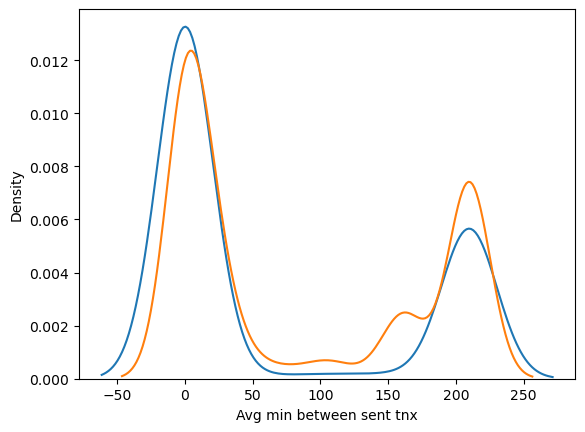

In [1504]:
sns.kdeplot(data=df1[df1['FLAG']==1], x='Avg min between sent tnx')
sns.kdeplot(data=df1[df1['FLAG']==0], x='Avg min between sent tnx')
plt.show()

In [1505]:
df1.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx',
       'Unique Received From Addresses', 'min value received',
       'max value received ', 'avg val received', 'max val sent',
       'avg val sent', 'total Ether sent', ' ERC20 uniq sent addr',
       ' ERC20 uniq rec addr', ' ERC20 min val rec', ' ERC20 avg val rec',
       ' ERC20 max val sent', ' ERC20 uniq rec token name',
       ' ERC20 most sent token type', ' ERC20_most_rec_token_type',
       'ERC-20 info all NA', 'hasCreatedContracts'],
      dtype='object')

In [1506]:
df1['Avg min between received tnx'] = df1['Avg min between received tnx'].apply(lambda x: min(x,1000))

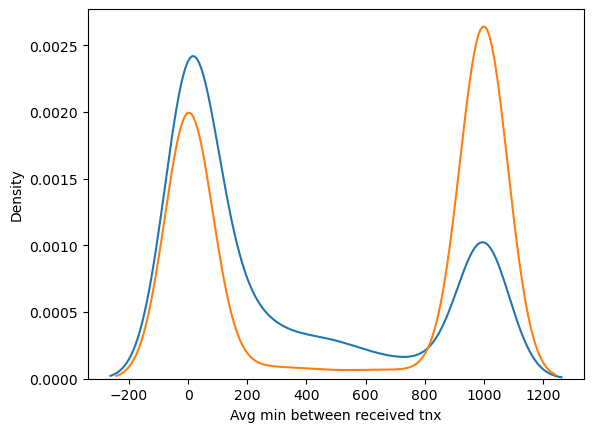

In [1507]:
sns.kdeplot(data=df1[df1['FLAG']==1], x='Avg min between received tnx')
sns.kdeplot(data=df1[df1['FLAG']==0], x='Avg min between received tnx')
plt.show()

In [1508]:
df1['Unique Received From Addresses'] = df1['Unique Received From Addresses'].apply(lambda x: min(x,50))

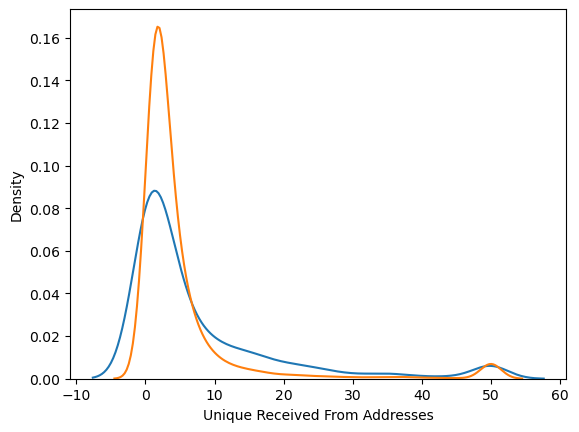

In [1509]:
sns.kdeplot(data=df1[df1['FLAG']==1], x='Unique Received From Addresses')
sns.kdeplot(data=df1[df1['FLAG']==0], x='Unique Received From Addresses')
plt.show()

In [1510]:
df1[df1['FLAG']==1][' ERC20_most_rec_token_type'].value_counts()

Unknown                          849
Blockwell say NOTSAFU            779
GSENetwork                        80
Livepeer Token                    46
blockwell.ai KYC Casper Token     39
                                ... 
GOT                                1
BOX Token                          1
Promodl                            1
BAX                                1
INS Promo1                         1
Name:  ERC20_most_rec_token_type, Length: 135, dtype: int64

#### Try to minimize dimensionality of Categorical variables

In [1511]:
keep = df1[' ERC20_most_rec_token_type'].value_counts().nlargest(20)

Again, notice how some names actually likely meant NA, but are labelled in different ways. We can try and identify these different labels and group them together

In [1512]:
df1[' ERC20_most_rec_token_type'] = df1[' ERC20_most_rec_token_type'].apply(lambda x: x if x in keep else 'others')

In [1513]:
df1[' ERC20_most_rec_token_type'].value_counts()

Unknown                             5291
others                              1296
OmiseGO                              873
Blockwell say NOTSAFU                779
DATAcoin                             358
Livepeer Token                       207
EOS                                  161
XENON                                145
Golem                                126
GSENetwork                            80
Tronix                                76
blockwell.ai KYC Casper Token         65
Promodl                               52
VIU                                   50
INS Promo                             44
Bulleon Promo Token                   44
KickCoin                              43
StatusNetwork                         42
Free BOB Tokens - BobsRepair.com      38
BAT                                   36
ERC20                                 35
Name:  ERC20_most_rec_token_type, dtype: int64

In [1514]:
df1[df1['FLAG']==1][' ERC20_most_rec_token_type'].value_counts() #side note: fraud has a large number of Blockwell say NOTSAFU

Unknown                             849
Blockwell say NOTSAFU               779
others                              202
GSENetwork                           80
Livepeer Token                       46
blockwell.ai KYC Casper Token        39
Free BOB Tokens - BobsRepair.com     37
ERC20                                35
XENON                                24
Tronix                               20
VIU                                  15
OmiseGO                              13
INS Promo                            10
DATAcoin                              8
Bulleon Promo Token                   7
KickCoin                              5
Golem                                 4
StatusNetwork                         3
EOS                                   2
Promodl                               1
Name:  ERC20_most_rec_token_type, dtype: int64

In [1515]:
df1[df1['FLAG']==0][' ERC20_most_rec_token_type'].value_counts()

Unknown                             4442
others                              1094
OmiseGO                              860
DATAcoin                             350
Livepeer Token                       161
EOS                                  159
Golem                                122
XENON                                121
Tronix                                56
Promodl                               51
StatusNetwork                         39
KickCoin                              38
Bulleon Promo Token                   37
BAT                                   36
VIU                                   35
INS Promo                             34
blockwell.ai KYC Casper Token         26
Free BOB Tokens - BobsRepair.com       1
Name:  ERC20_most_rec_token_type, dtype: int64

Group those variables of a low frequency under "Others"

In [1516]:
keep = df1[' ERC20 most sent token type'].value_counts().nlargest(8).index

In [1517]:
df1[' ERC20 most sent token type'] = df1[' ERC20 most sent token type'].apply(lambda x: x if x in keep else 'others')

In [1518]:
df1[df1['FLAG']==1][' ERC20 most sent token type'].value_counts()

Unknown                          2021
others                            108
blockwell.ai KYC Casper Token      33
OmiseGO                             7
Golem                               4
EOS                                 3
StatusNetwork                       2
BAT                                 1
Name:  ERC20 most sent token type, dtype: int64

In [1519]:
df1[df1['FLAG']==0][' ERC20 most sent token type'].value_counts()

Unknown                          6267
others                            779
EOS                               135
OmiseGO                           130
Golem                             126
blockwell.ai KYC Casper Token      95
StatusNetwork                      59
BAT                                37
Qtum                               34
Name:  ERC20 most sent token type, dtype: int64

Since data is imbalanced, we need to do resampling as random forests and logistic regression do not handle imbalanced data well. In this case, oversampling is chosen but this can also create other issues which shouldn't be disregarded. 
click [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) to find out more.

#### TRAIN TEST SPLIT

done before the fiting of scalars and vectorizers to avoid data leakage

In [1520]:
from sklearn.model_selection import train_test_split
X = df1.drop(columns=["FLAG"])
y = df1['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,train_size=0.80)

In [1521]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

Split continuous from categorical data

In [1418]:
continuous_train = X_train.drop(columns=[' ERC20_most_rec_token_type',' ERC20 most sent token type'])
cat_train = X_train[[' ERC20_most_rec_token_type',' ERC20 most sent token type']]

continuous_test = X_test.drop(columns=[' ERC20_most_rec_token_type',' ERC20 most sent token type'])
cat_test = X_test[[' ERC20_most_rec_token_type',' ERC20 most sent token type']]

In [1419]:
continuous_test.columns==continuous_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Scale the continuous variables

In [1523]:
non_scale_train = continuous_train[['Sent tnx','Unique Received From Addresses',' ERC20 uniq rec addr',' ERC20 uniq rec token name','hasCreatedContracts','ERC-20 info all NA']]
to_scale_train = continuous_train.drop(columns=['Sent tnx','Unique Received From Addresses',' ERC20 uniq rec addr',' ERC20 uniq rec token name','hasCreatedContracts','ERC-20 info all NA'])
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_train = scalar.fit_transform(to_scale_train)
scaled_train = pd.DataFrame(scaled_train, columns=to_scale_train.columns)


non_scale_test = continuous_test[['Sent tnx','Unique Received From Addresses',' ERC20 uniq rec addr',' ERC20 uniq rec token name','hasCreatedContracts','ERC-20 info all NA']]
to_scale_test = continuous_test.drop(columns=['Sent tnx','Unique Received From Addresses',' ERC20 uniq rec addr',' ERC20 uniq rec token name','hasCreatedContracts','ERC-20 info all NA'])
scaled_test = scalar.transform(to_scale_test)
# scaled.corrwith(df1['FLAG']).sort_values(ascending=False)

In [1527]:
from sklearn.preprocessing import OneHotEncoder
sent_enc = OneHotEncoder(categories='auto')
sent_vects_train = sent_enc.fit_transform(cat_train[[' ERC20 most sent token type']]).toarray()
sent_vects_test = sent_enc.transform(cat_test[[' ERC20 most sent token type']]).toarray()
rec_enc = OneHotEncoder(categories='auto')
rec_vects_train = rec_enc.fit_transform(cat_train[[' ERC20_most_rec_token_type']]).toarray()
rec_vects_test = rec_enc.transform(cat_test[[' ERC20_most_rec_token_type']]).toarray()

In [1528]:
X_train = np.hstack([scaled_train,non_scale_train,rec_vects_train,sent_vects_train])
X_test = np.hstack([scaled_test,non_scale_test,rec_vects_test,sent_vects_test])

In [1529]:
X_test.shape,X_train.shape

((1969, 49), (12240, 49))

In [1530]:
feature_names = np.concatenate([scalar.feature_names_in_, 
non_scale_train.columns, 
rec_enc.categories_[0], 
sent_enc.categories_[0]])

df_train = pd.DataFrame(data=X_train, columns=feature_names)
df_train['FLAG'] = y_train.values
df_train.to_csv("train.csv")
df_test = pd.DataFrame(data=X_test, columns=feature_names)
df_test['FLAG'] = y_test.values
df_test.to_csv("test.csv")

In [1531]:
scaled_test.shape, scalar.feature_names_in_.shape

((1969, 13), (13,))

In [1532]:
non_scale_train.columns.shape,non_scale_train.shape

((6,), (12240, 6))

In [1533]:
rec_vects_train.shape, len(rec_enc.categories_[0])

((12240, 21), 21)

In [1534]:
sent_vects_train.shape, len(sent_enc.categories_[0])

((12240, 9), 9)

In [1535]:
def getWhichFeatureNameUnder(index):
    '''takes in the column index and gets the name of the feature that value falls under'''
    if len(scalar.feature_names_in_) - 1 >= index:
        return scalar.feature_names_in_[index]
    else:
        index -= len(scalar.feature_names_in_)
        if len(non_scale_train.columns) - 1 >= index:
            return non_scale_train.columns[index]
        else:
            index -= len(non_scale_train.columns)
            if len(rec_enc.categories_[0]) - 1 >= index:
                return rec_enc.feature_names_in_[0]
            else:
                return sent_enc.feature_names_in_[0]

In [1536]:
features_value_pair = np.array([np.array((getWhichFeatureNameUnder(index),feature_names[index])) for index in list(range(0,49))])
features_value_pair

array([['Avg min between sent tnx', 'Avg min between sent tnx'],
       ['Avg min between received tnx', 'Avg min between received tnx'],
       ['Time Diff between first and last (Mins)',
        'Time Diff between first and last (Mins)'],
       ['min value received', 'min value received'],
       ['max value received ', 'max value received '],
       ['avg val received', 'avg val received'],
       ['max val sent', 'max val sent'],
       ['avg val sent', 'avg val sent'],
       ['total Ether sent', 'total Ether sent'],
       [' ERC20 uniq sent addr', ' ERC20 uniq sent addr'],
       [' ERC20 min val rec', ' ERC20 min val rec'],
       [' ERC20 avg val rec', ' ERC20 avg val rec'],
       [' ERC20 max val sent', ' ERC20 max val sent'],
       ['Sent tnx', 'Sent tnx'],
       ['Unique Received From Addresses',
        'Unique Received From Addresses'],
       [' ERC20 uniq rec addr', ' ERC20 uniq rec addr'],
       [' ERC20 uniq rec token name', ' ERC20 uniq rec token name'],
       

In [1537]:
names = pd.DataFrame(data=features_value_pair,columns=['Feature','Category if Applicable'])
same = names['Feature'] == names['Category if Applicable']
names['Category if Applicable'][same] = None
names
names.to_csv('feature_category.csv')

In [1538]:
names.shape

(49, 2)